In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from ml_utils.util import remove_empty_from_array
from ml_utils.util import flatten

In [5]:
# path2target = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/78/rc_4-np_7'
path2target = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/90/sf'

In [6]:
if os.path.exists(os.path.join(path2target, 'function.data')):
    with open(os.path.join(path2target, 'function.data'), mode='r') as f:
        lines = [s.strip() for s in f.readlines()]

idx_list = []
for i, line in enumerate(lines):
    if len(remove_empty_from_array(line.split(' '))) == 1:
        idx_list.append(i)
    

sf_val_list = []
for i, idx in enumerate(idx_list):
    try:
        block = lines[idx+1:idx_list[i+1]-1]
    except:
        block = lines[idx+1:-1]
    
    for l in block:
        sf_val_list.append(list(map(float, remove_empty_from_array(l.split(' ')))))

In [7]:
with open(os.path.join(path2target, 'input.nn'), mode='r') as f:
    lines = [s.strip() for s in f.readlines()]

sf_lines = list(filter(lambda x: 'symfunction_short' in x, lines))

In [8]:
sf_columns = []
for l in sf_lines:
    arr = l.split(' ')
    sf_columns.append('_'.join(arr))
    # eta = arr[-3]
    # rs = arr[-2]
    # rcut = arr[-1]
    # sf_columns.append(f'eta-{eta}_rs-{rs}_rcut-{rcut}')

In [9]:
df_sf= pd.DataFrame(data=np.array(sf_val_list)[:,1:], columns=sf_columns, dtype='float16')

In [10]:
df_sf

,symfunction_short_Si_2_Si_5.113_1.0_3.0,symfunction_short_Si_2_Si_2.458_1.442_3.0,symfunction_short_Si_2_Si_1.182_2.08_3.0,symfunction_short_Si_2_Si_10.36_0.75_3.0,symfunction_short_Si_2_Si_5.181_1.061_3.0,symfunction_short_Si_2_Si_2.59_1.5_3.0,symfunction_short_Si_2_Si_1.295_2.121_3.0,symfunction_short_Si_2_Si_19.26_0.6_3.0,symfunction_short_Si_2_Si_10.12_0.8278_3.0,symfunction_short_Si_2_Si_5.316_1.142_3.0,...,symfunction_short_Si_3_Si_Si_0.03125_-1.0_6.0_4.0_0.0,symfunction_short_Si_3_Si_Si_0.03125_1.0_6.0_4.0_0.0,symfunction_short_Si_9_Si_Si_0.05556_-1.0_1.0_4.0_0.0,symfunction_short_Si_9_Si_Si_0.05556_1.0_1.0_4.0_0.0,symfunction_short_Si_9_Si_Si_0.05556_-1.0_6.0_4.0_0.0,symfunction_short_Si_9_Si_Si_0.05556_1.0_6.0_4.0_0.0,symfunction_short_Si_9_Si_Si_0.03125_-1.0_1.0_4.0_0.0,symfunction_short_Si_9_Si_Si_0.03125_1.0_1.0_4.0_0.0,symfunction_short_Si_9_Si_Si_0.03125_-1.0_6.0_4.0_0.0,symfunction_short_Si_9_Si_Si_0.03125_1.0_6.0_4.0_0.0
0,1.707458e-02,1.745605e-02,1.795959e-02,1.846313e-02,0.001619,0.001899,0.002329,0.002840,4.768372e-07,1.013279e-06,...,0.001212,0.000019,0.428467,0.348145,0.105347,0.070984,0.182251,0.136963,0.040588,0.024948
1,1.777649e-02,1.817322e-02,1.872253e-02,1.927185e-02,0.001599,0.001878,0.002306,0.002815,3.576279e-07,7.748604e-07,...,0.001271,0.000021,0.428223,0.346680,0.104736,0.070557,0.183228,0.136963,0.040497,0.024780
2,1.898193e-02,1.939392e-02,1.995850e-02,2.052307e-02,0.001829,0.002146,0.002632,0.003210,5.364418e-07,1.132488e-06,...,0.001304,0.000020,0.440430,0.357422,0.107666,0.073364,0.189087,0.142090,0.041870,0.026062
3,2.056885e-02,2.101135e-02,2.160645e-02,2.218628e-02,0.002127,0.002493,0.003056,0.003723,7.748604e-07,1.609325e-06,...,0.001354,0.000022,0.443359,0.359375,0.108337,0.073303,0.191040,0.143188,0.042145,0.025970
4,1.786804e-02,1.826477e-02,1.879883e-02,1.934814e-02,0.001636,0.001920,0.002357,0.002876,4.172325e-07,8.344650e-07,...,0.001260,0.000020,0.445557,0.363037,0.109253,0.075195,0.190063,0.143677,0.042267,0.026718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841487,4.172325e-07,4.172325e-07,4.172325e-07,4.172325e-07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
841488,2.632141e-03,2.693176e-03,2.777100e-03,2.868652e-03,0.000170,0.000201,0.000247,0.000301,0.000000e+00,5.960464e-08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
841489,2.632141e-03,2.693176e-03,2.777100e-03,2.868652e-03,0.000170,0.000201,0.000247,0.000301,0.000000e+00,5.960464e-08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
841490,6.395578e-05,6.473064e-05,6.592274e-05,6.735325e-05,0.000001,0.000001,0.000001,0.000002,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_sf_sampled = df_sf.sample(n=100000, random_state=42).reset_index(drop=True)

In [ ]:
df_sf_sampled

In [ ]:
# fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(111)
# sns.boxplot(data=df_sf, showfliers=False, ax=ax)
# sns.stripplot(data=df_sf, jitter=True, ax=ax)

In [ ]:
columns = df_sf.columns

for column in columns:
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    ax.set_xlabel(column)
    ax.set_ylabel('occurence')
    ax.hist(df_sf[column], bins=100)
    # ax.hist(df_sf_sampled[column], bins=100)
    fig.show()
    # break

In [ ]:
# corr = df_sf_sampled.corr()
corr = df_sf.corr()
# sns.heatmap(corr, cmap="Blues", annot=True)

In [11]:
cor_matrix = df_sf.corr().abs()
print(cor_matrix)

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                                                    symfunction_short_Si_2_Si_5.113_1.0_3.0  \
symfunction_short_Si_2_Si_5.113_1.0_3.0                                            1.000000   
symfunction_short_Si_2_Si_2.458_1.442_3.0                                          0.999737   
symfunction_short_Si_2_Si_1.182_2.08_3.0                                           0.998295   
symfunction_short_Si_2_Si_10.36_0.75_3.0                                           0.994937   
symfunction_short_Si_2_Si_5.181_1.061_3.0                                          0.890695   
...                                                                                     ...   
symfunction_short_Si_9_Si_Si_0.05556_1.0_6.0_4....                                 0.805845   
symfunction_short_Si_9_Si_Si_0.03125_-1.0_1.0_4...                                 0.810725   
symfunction_short_Si_9_Si_Si_0.03125_1.0_1.0_4....                                 0.799797   
symfunction_short_Si_9_Si_Si_0.03125_-1.0_6.0_4...

/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_34230/4032810753.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [12]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['symfunction_short_Si_2_Si_2.458_1.442_3.0', 'symfunction_short_Si_2_Si_1.182_2.08_3.0', 'symfunction_short_Si_2_Si_10.36_0.75_3.0', 'symfunction_short_Si_2_Si_2.59_1.5_3.0', 'symfunction_short_Si_2_Si_1.295_2.121_3.0', 'symfunction_short_Si_2_Si_19.26_0.6_3.0', 'symfunction_short_Si_2_Si_5.316_1.142_3.0', 'symfunction_short_Si_2_Si_2.792_1.576_3.0', 'symfunction_short_Si_2_Si_1.467_2.174_3.0', 'symfunction_short_Si_2_Si_18.18_0.674_3.0', 'symfunction_short_Si_2_Si_10.0_0.9086_3.0', 'symfunction_short_Si_2_Si_1.383_1.923_4.0', 'symfunction_short_Si_2_Si_0.6647_2.773_4.0', 'symfunction_short_Si_2_Si_5.828_1.0_4.0', 'symfunction_short_Si_2_Si_2.914_1.414_4.0', 'symfunction_short_Si_2_Si_1.457_2.0_4.0', 'symfunction_short_Si_2_Si_0.7286_2.828_4.0', 'symfunction_short_Si_2_Si_10.84_0.8_4.0', 'symfunction_short_Si_2_Si_5.692_1.104_4.0', 'symfunction_short_Si_2_Si_2.99_1.523_4.0', 'symfunction_short_Si_2_Si_1.571_2.101_4.0', 'symfunction_short_Si_2_Si_0.8251_2.899_4.0', 'symfunction_short_S

In [13]:
df_corr_removed = df_sf.drop(columns=to_drop, axis=1)

In [15]:
for col in df_corr_removed.columns:
    print('_'.join(col.split('_')[:2]) ,' '.join(col.split('_')[2:]))

symfunction_short Si 2 Si 5.113 1.0 3.0
symfunction_short Si 2 Si 5.181 1.061 3.0
symfunction_short Si 2 Si 10.12 0.8278 3.0
symfunction_short Si 2 Si 33.03 0.5 3.0
symfunction_short Si 2 Si 5.505 1.225 3.0
symfunction_short Si 2 Si 3.029 1.651 3.0
symfunction_short Si 2 Si 1.667 2.226 3.0
symfunction_short Si 2 Si 2.876 1.333 4.0
symfunction_short Si 2 Si 0.9378 2.967 4.0
symfunction_short Si 3 Si Si 0.05556 -1.0 1.0 6.0 0.0
symfunction_short Si 3 Si Si 0.05556 -1.0 6.0 6.0 0.0
symfunction_short Si 9 Si Si 0.05556 -1.0 1.0 6.0 0.0


,symfunction_short_Si_2_Si_5.113_1.0_3.0,symfunction_short_Si_2_Si_5.181_1.061_3.0,symfunction_short_Si_2_Si_10.12_0.8278_3.0,symfunction_short_Si_2_Si_33.03_0.5_3.0,symfunction_short_Si_2_Si_5.505_1.225_3.0,symfunction_short_Si_2_Si_1.667_2.226_3.0,symfunction_short_Si_2_Si_2.876_1.333_4.0,symfunction_short_Si_3_Si_Si_0.05556_-1.0_1.0_6.0_0.0,symfunction_short_Si_3_Si_Si_0.05556_-1.0_6.0_6.0_0.0,symfunction_short_Si_9_Si_Si_0.05556_-1.0_1.0_6.0_0.0
symfunction_short_Si_2_Si_5.113_1.0_3.0,1.000000,0.857214,0.278562,0.106117,0.024399,0.007393,0.821546,0.787501,0.600717,0.868847
symfunction_short_Si_2_Si_5.181_1.061_3.0,0.857214,1.000000,0.616206,0.326472,0.090674,0.027602,0.528952,0.617847,0.769514,0.630747
symfunction_short_Si_2_Si_10.12_0.8278_3.0,0.278562,0.616206,1.000000,0.861164,0.390630,0.149700,0.064776,0.157551,0.609347,0.129572
symfunction_short_Si_2_Si_33.03_0.5_3.0,0.106117,0.326472,0.861164,1.000000,0.675280,0.317088,0.007759,0.065908,0.415447,0.044974
symfunction_short_Si_2_Si_5.505_1.225_3.0,0.024399,0.090674,0.390630,0.675280,1.000000,0.806644,0.002665,0.026676,0.185185,0.016267
symfunction_short_Si_2_Si_1.667_2.226_3.0,0.007393,0.027602,0.149700,0.317088,0.806644,1.000000,0.001847,0.011963,0.080620,0.007051
symfunction_short_Si_2_Si_2.876_1.333_4.0,0.821546,0.528952,0.064776,0.007759,0.002665,0.001847,1.000000,0.771606,0.365028,0.935380
symfunction_short_Si_3_Si_Si_0.05556_-1.0_1.0_6.0_0.0,0.787501,0.617847,0.157551,0.065908,0.026676,0.011963,0.771606,1.000000,0.543560,0.934378
symfunction_short_Si_3_Si_Si_0.05556_-1.0_6.0_6.0_0.0,0.600717,0.769514,0.609347,0.415447,0.185185,0.080620,0.365028,0.543560,1.000000,0.485842
symfunction_short_Si_9_Si_Si_0.05556_-1.0_1.0_6.0_0.0,0.868847,0.630747,0.129572,0.044974,0.016267,0.007051,0.935380,0.934378,0.485842,1.000000


<AxesSubplot: >

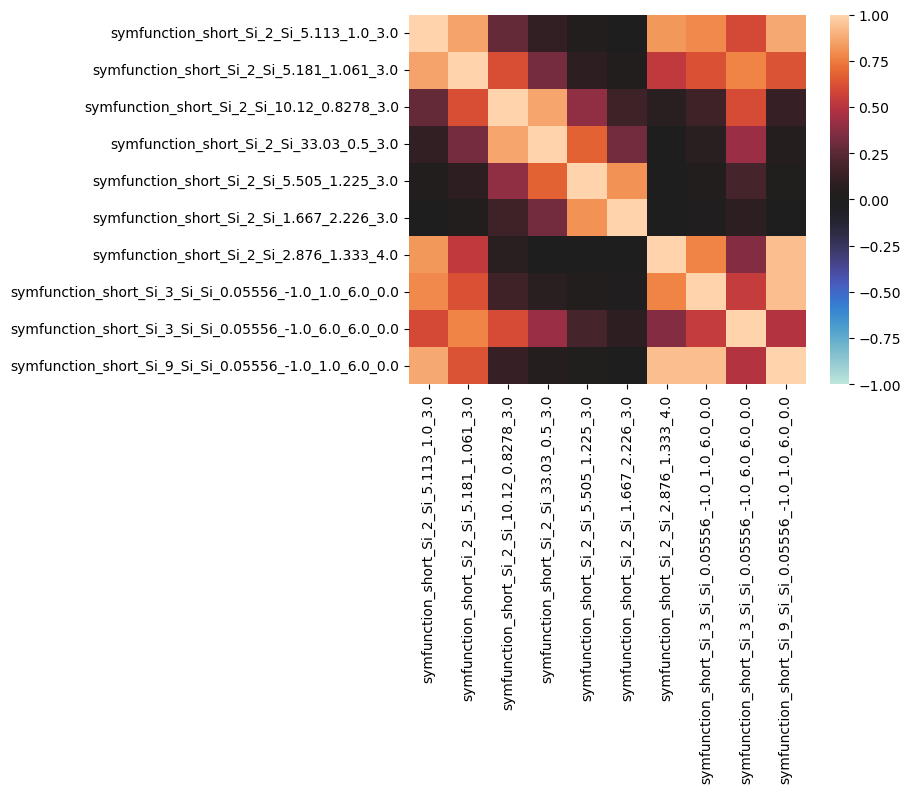

In [ ]:
sns.heatmap(df_corr_removed.corr(), vmax=1, vmin=-1, center=0)

In [ ]:
|